# Linear regression on HadCRUT v5

- [Section 1](#1)
- [Section 2](#2)
- [Section 3](#3)



In [1]:
# Questions for Nathan
# Compond uncertainty in estimating several means simultaneously
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from cartopy import crs as ccrs, feature as cfeature
from sklearn.linear_model import LinearRegression
from 


# Plotting config 
plt.rcParams['figure.figsize'] = [12, 8]
%config InlineBackend.figure_format = "retina"

In [2]:
dataset = xr.open_dataset("data/HadCRUT.5.0.2.0.analysis.anomalies.1.nc")

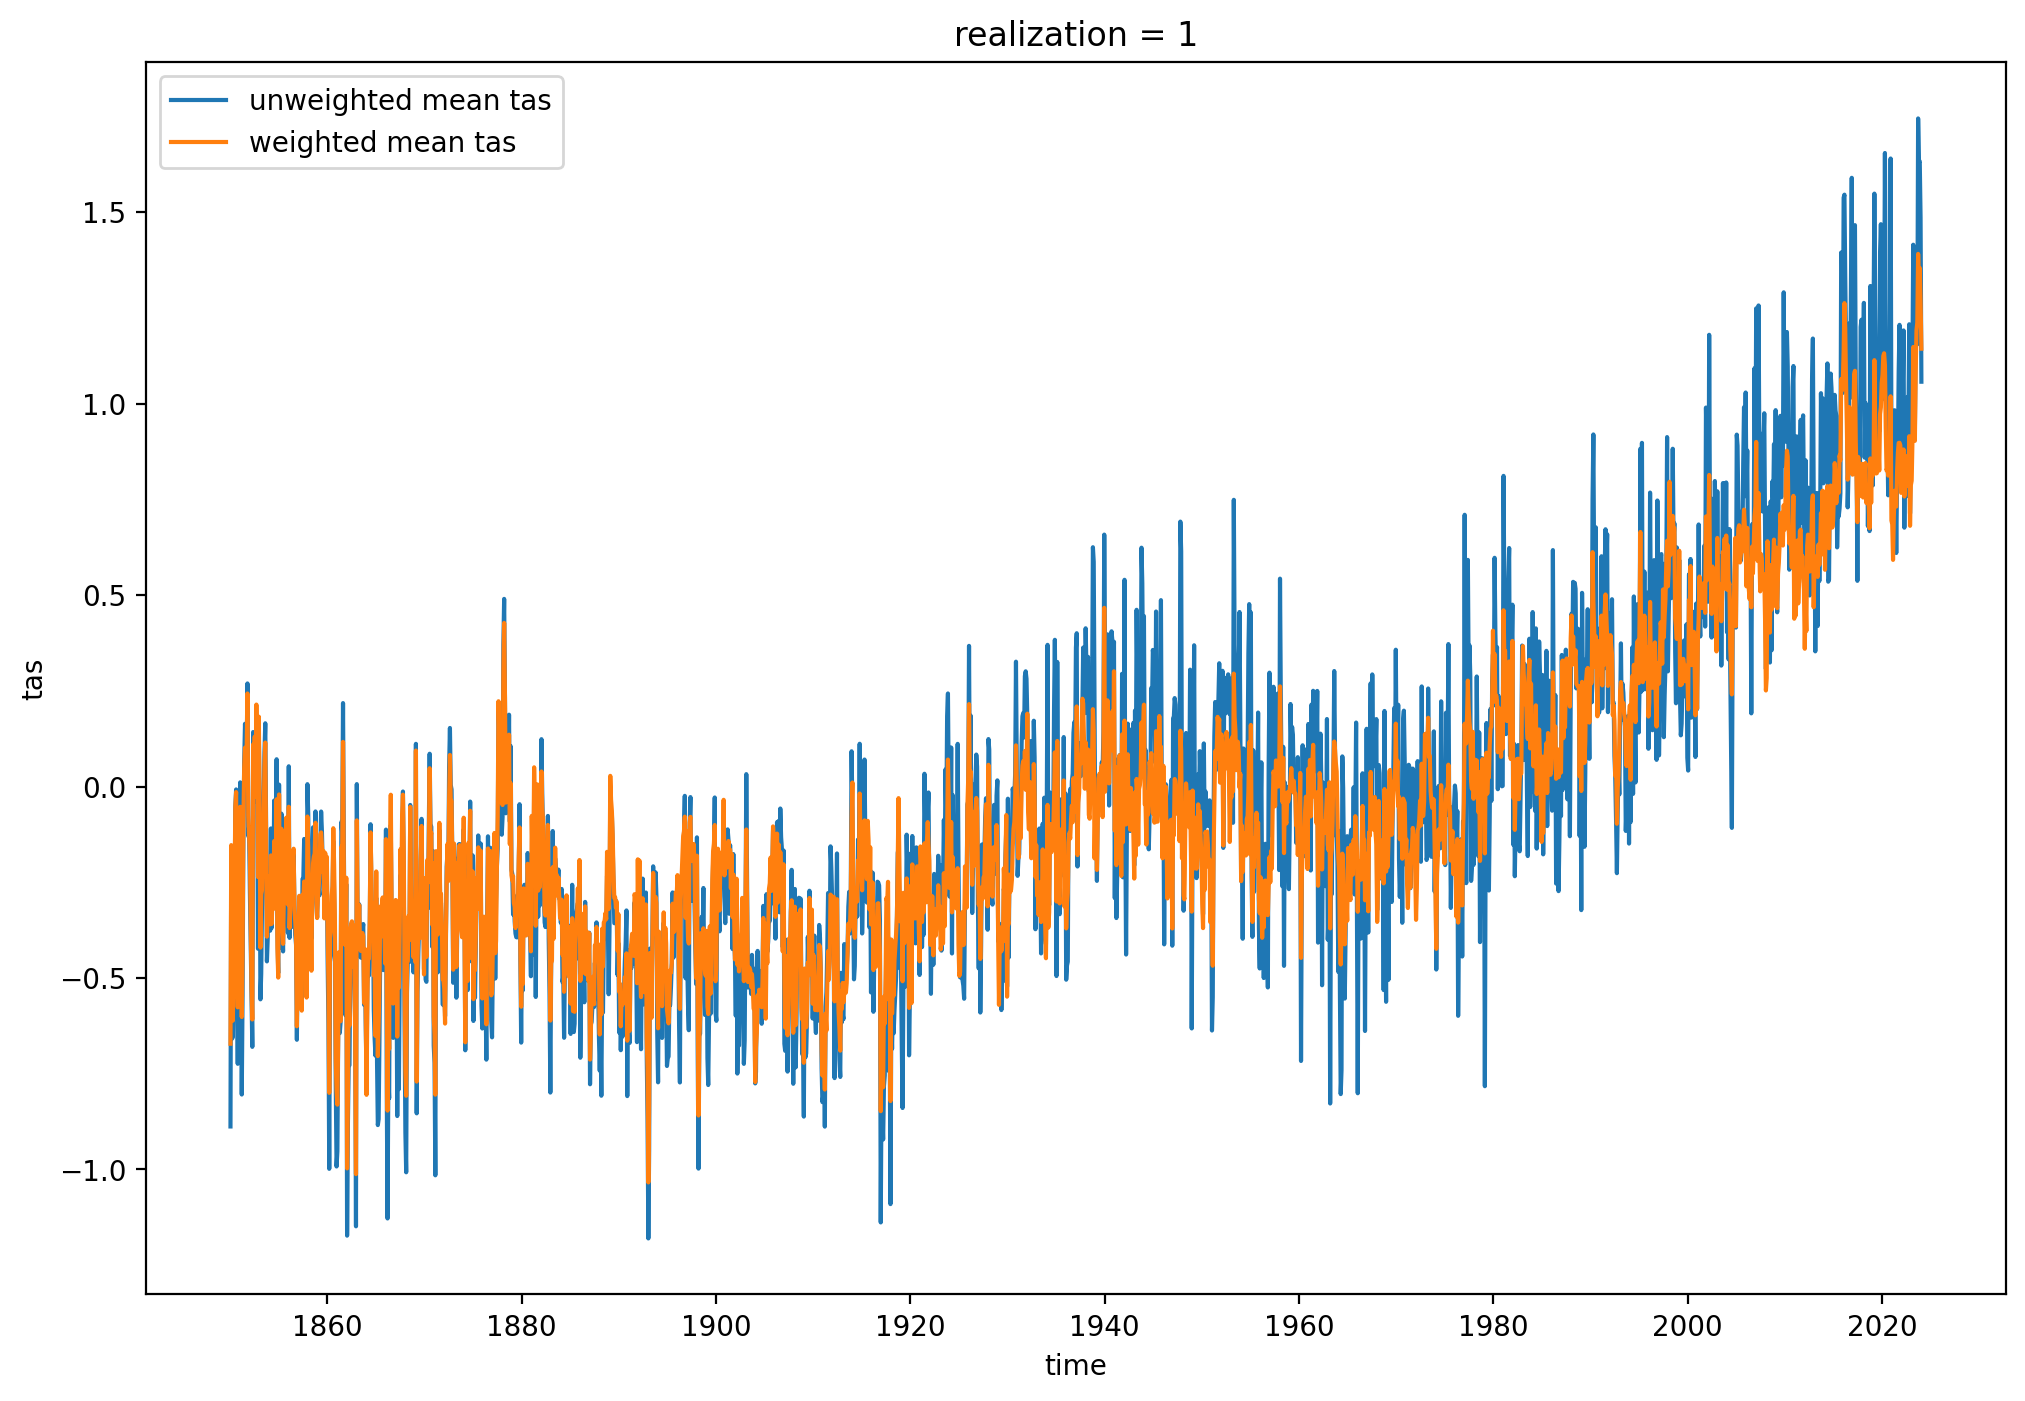

In [3]:
# Explain need for weighted average 

weights = np.cos(np.deg2rad(dataset.tas.latitude))
weights.name = "weights"
dataset_weighted = dataset.tas.weighted(weights)
dataset.tas.mean(dim=("longitude", "latitude")).plot(label="unweighted mean tas")
dataset_weighted.mean(dim=("longitude", "latitude")).plot(label="weighted mean tas")

plt.legend()

## Feature preperation

In [4]:
global_anoms = dataset_weighted.mean(dim=("longitude", "latitude"))
anoms_list = global_anoms.values
time_list = global_anoms.coords["time"].values
time_floats = time_list.astype("float").reshape(-1, 1)

# Simple linear regression

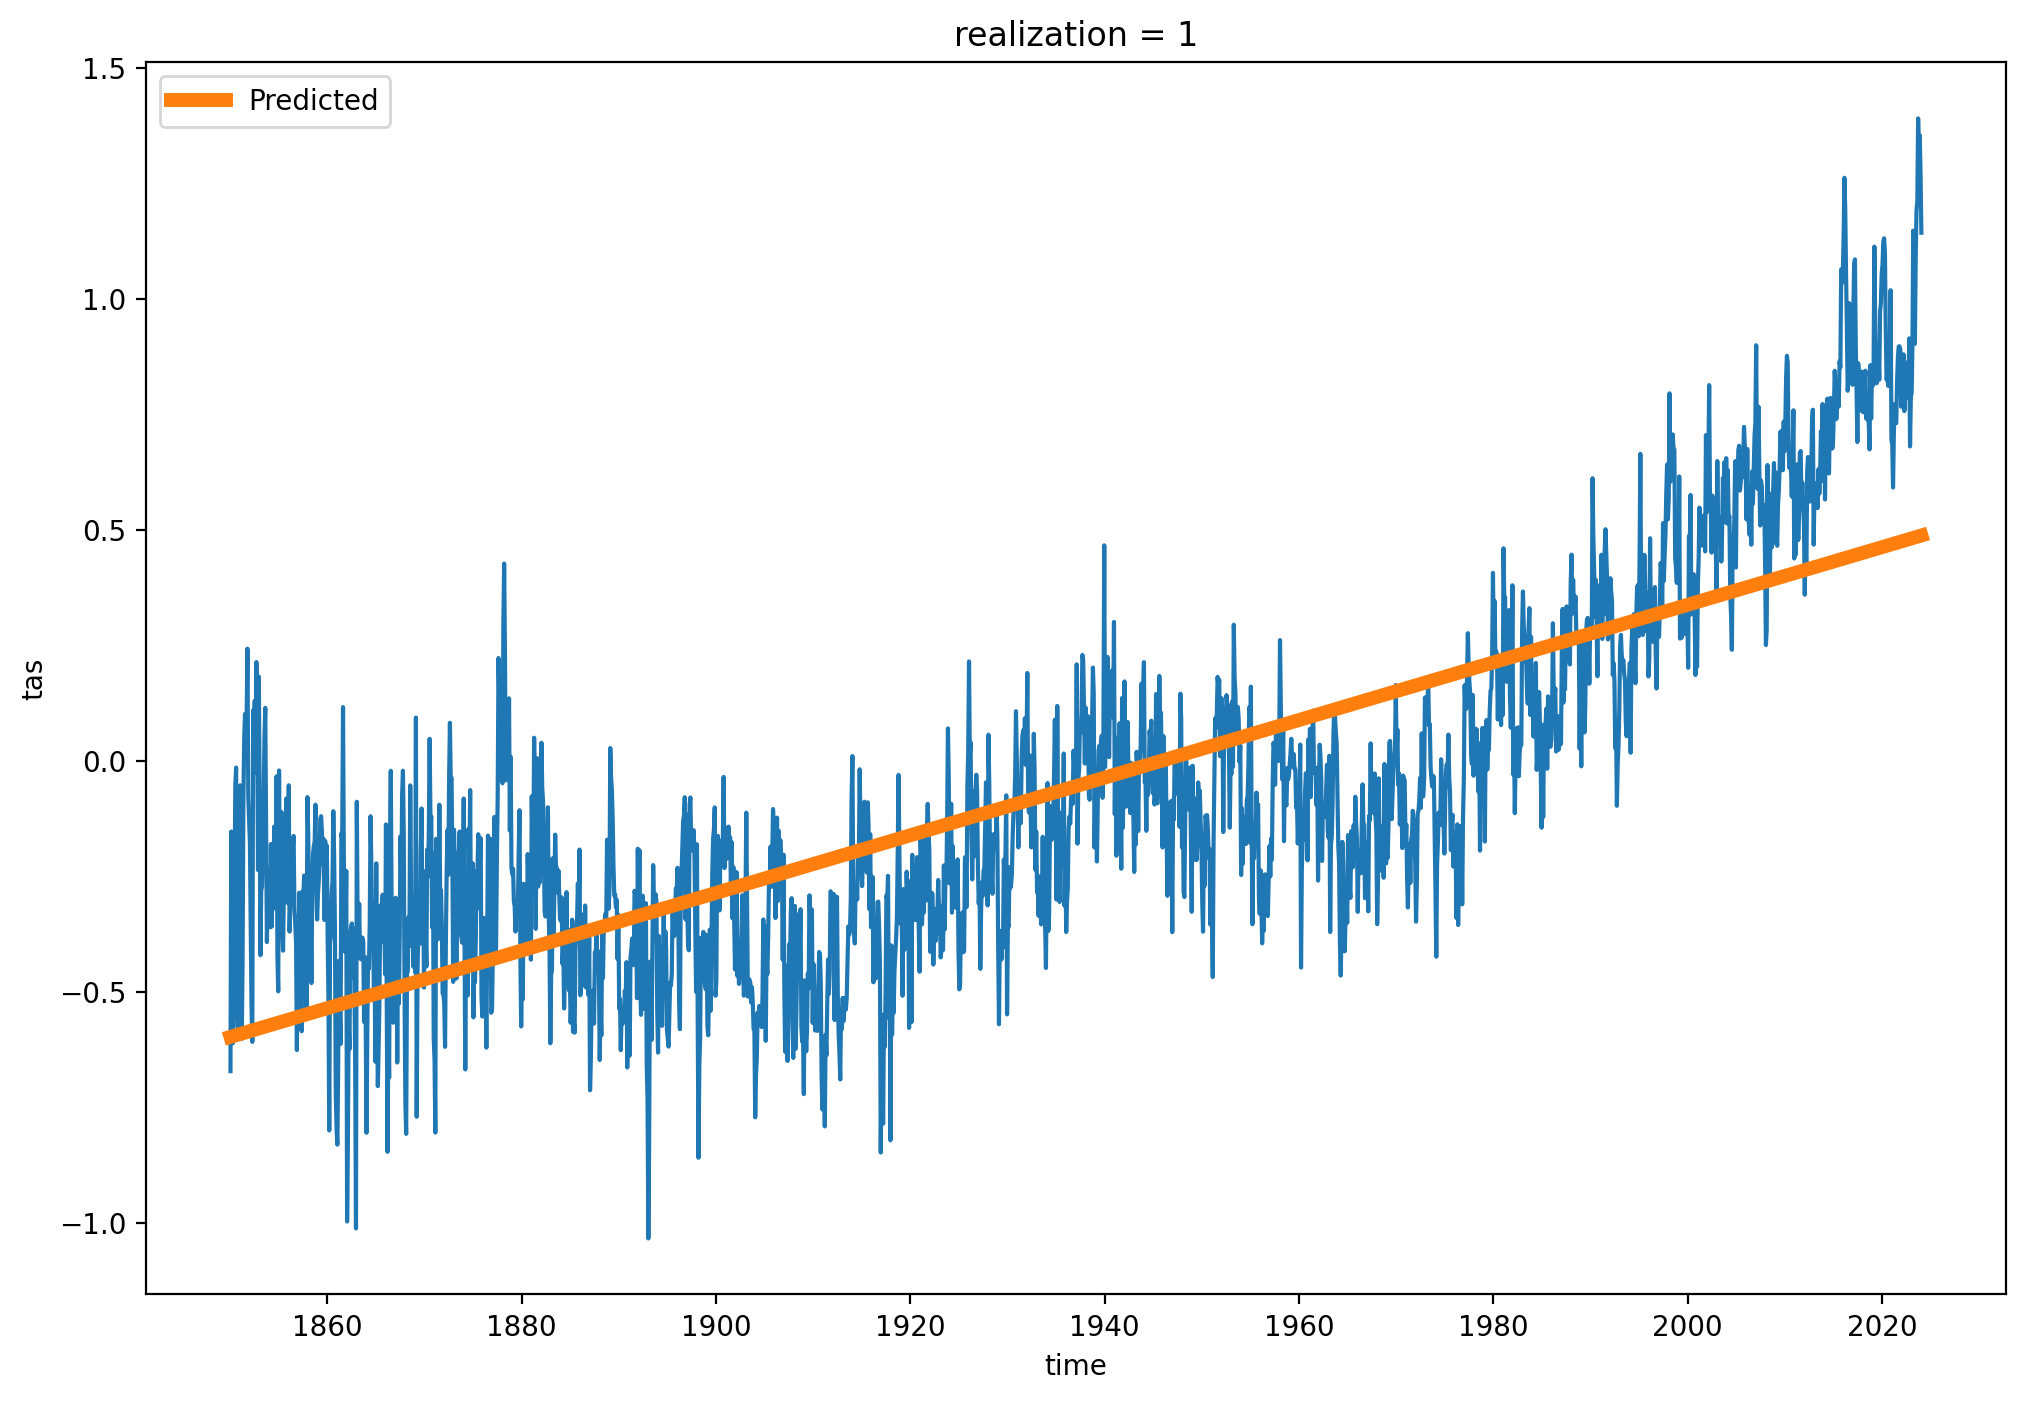

In [5]:
reg = LinearRegression().fit(time_floats, anoms_list)

global_anoms.plot()
anoms_predicted = reg.predict(time_floats)
plt.plot(time_list, anoms_predicted, label="Predicted", linewidth=5)
plt.legend()